# Credit Scoring Model

## Imports

In [103]:
#import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from IPython.display import Markdown

## Data Collection

In [2]:
# Download latest version
#path = kagglehub.dataset_download("uciml/default-of-credit-card-clients-dataset")

#print("Path to dataset files:", path)

### Data Glossary

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly (on_time), 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

In [ ]:
df=pd.read_csv("data/UCI_Credit_Card.csv")

In [4]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


## Exploratory Data Analysis

In [6]:
n=df.shape[0]
print(f'{n} rows')

30000 rows


### Column types

In [7]:
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

### Limit Balance Analysis

Min $10,000
Mode $50,000
Mean $167,484
Max $1,000,000


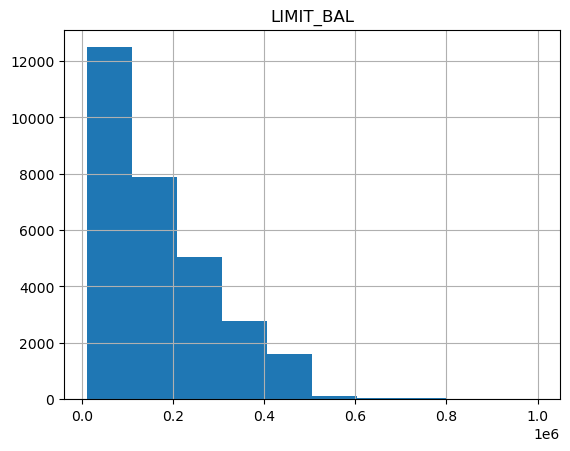

In [ ]:
df.hist(column='LIMIT_BAL',bins=10) #Limit Balance is in range [$10,000.0, $1'000,000.0)
print(f"Min ${df['LIMIT_BAL'].min():,.0f}")# Min
print(f"Mode ${ df['LIMIT_BAL'].mode()[0]:,.0f}")
limit_bal_mean = df['LIMIT_BAL'].mean()
print(f"Mean ${limit_bal_mean:,.0f}")# Mean
print(f"Max ${df['LIMIT_BAL'].max():,.0f}")# Max

<Axes: >

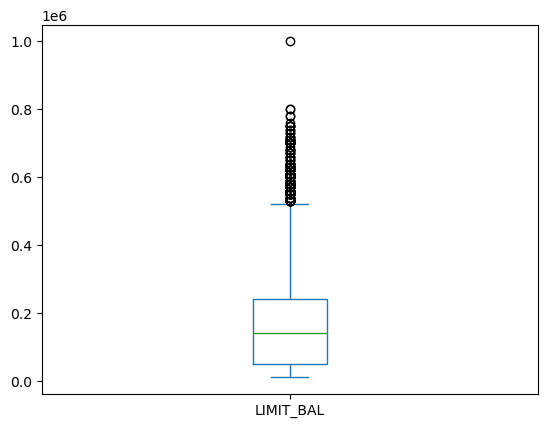

In [9]:
df.plot.box(column='LIMIT_BAL')

### Gender Analysis

In [10]:
sex=df.groupby('SEX').count()['ID'] # Gender (1=male, 2=female)
# More females than males, which %?
# We need to change this to indicator function using one hot encoding

In [11]:
sex.index = ['Male','Female']

<Axes: title={'center': 'Sex Ratio'}, ylabel='ID'>

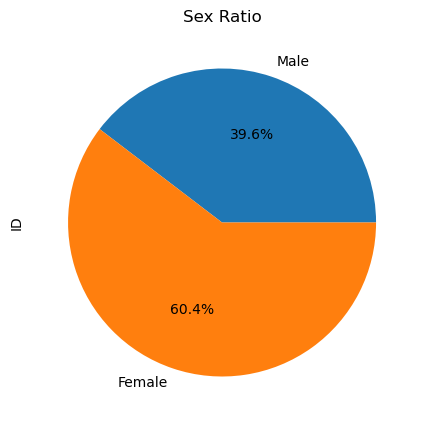

In [12]:
sex \
    .plot.pie(autopct='%.1f%%', figsize=(5, 5), title='Sex Ratio')

### Education Analysis

<Axes: xlabel='EDUCATION'>

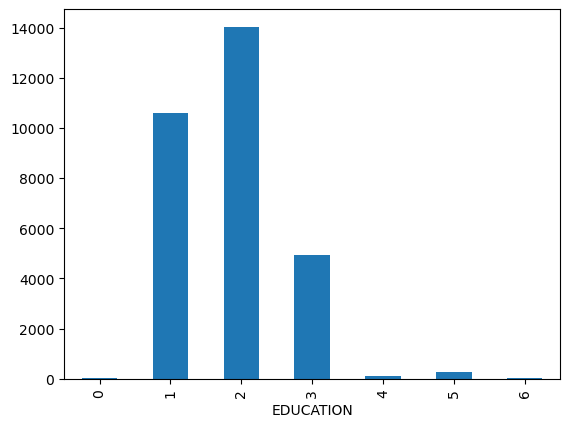

In [ ]:
education=df.groupby('EDUCATION').count()['ID'] # 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown
education.plot(kind='bar')


### Marriage Analysis

<Axes: xlabel='MARRIAGE'>

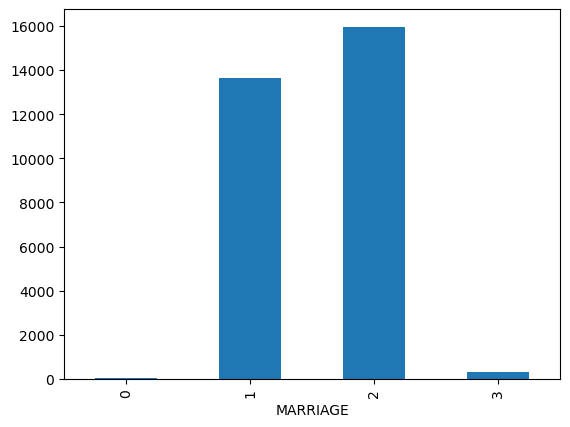

In [ ]:
marriage=df.groupby('MARRIAGE').count()['ID'] # 1=married, 2=single, 3=others
marriage.plot(kind='bar')


### Age Analysis

Min 21
Mode 29
Mean 35.4855
Max 79


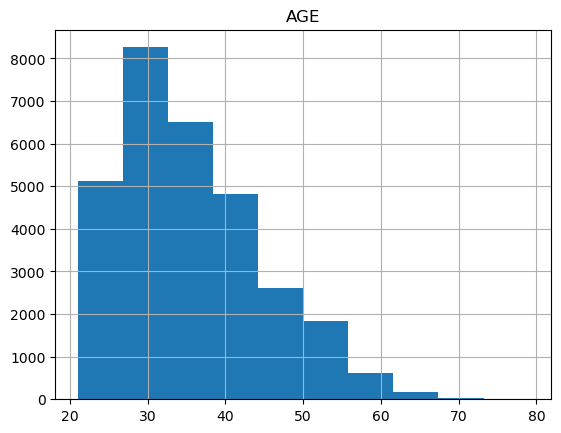

In [ ]:
df.hist(column='AGE',bins=10)
print(f"Min {df['AGE'].min()}")
print(f"Mode { df['AGE'].mode()[0]}")
print(f"Mean { df['AGE'].mean() }")
print(f"Max {df['AGE'].max()}")

<Axes: >

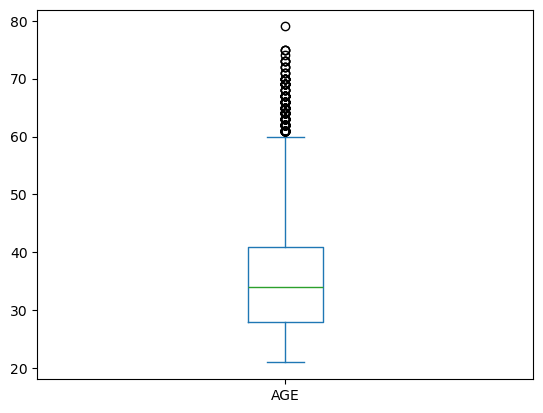

In [17]:
df.plot.box(column='AGE')

### Pay Status Analysis

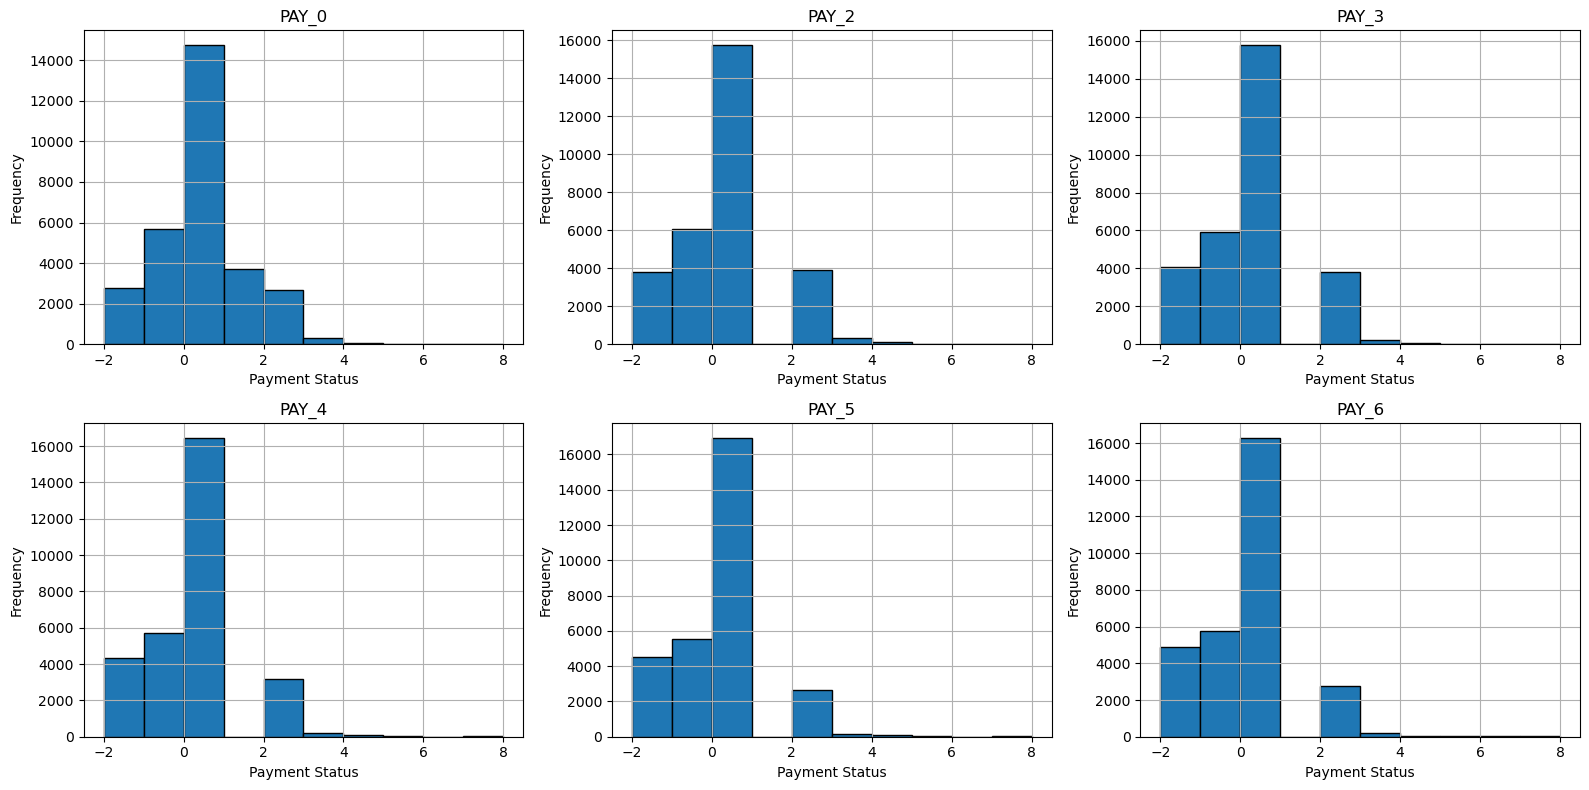

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']):
    df[col].hist(ax=axes[i], bins=10, edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Payment Status')
    axes[i].set_ylabel('Frequency')

#axes[5].axis('off')
plt.tight_layout()
plt.show()

In [19]:

for i, col in enumerate(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']):
    if i==0:
        ant_df=df[col].value_counts()
    else:
        ant_df=pd.DataFrame.join(ant_df, df[col].value_counts(), rsuffix=f'_{col}')

In [20]:
ant_df.sum()

count          30000.0
count_PAY_2    30000.0
count_PAY_3    30000.0
count_PAY_4    30000.0
count_PAY_5    30000.0
count_PAY_6    30000.0
dtype: float64

In [21]:
ant_df.sort_index(inplace=True)

In [22]:
ant_df.columns=[0,-1,-2,-3,-4,-5]

In [23]:
ant_df

,0,-1,-2,-3,-4,-5
PAY_0,,,,,,
-2,2759,3782,4085,4348,4546.0,4895.0
-1,5686,6050,5938,5687,5539.0,5740.0
0,14737,15730,15764,16455,16947.0,16286.0
1,3688,28,4,2,NaN,NaN
2,2667,3927,3819,3159,2626.0,2766.0
3,322,326,240,180,178.0,184.0
4,76,99,76,69,84.0,49.0
5,26,25,21,35,17.0,13.0
6,11,12,23,5,4.0,19.0


<Axes: >

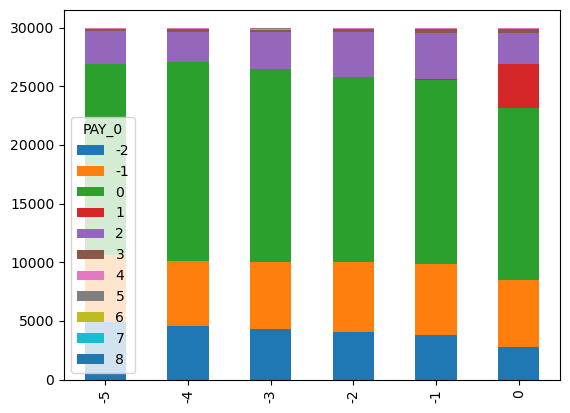

In [24]:
ant_df.T.sort_index().plot(kind='bar',stacked=True)

#### Observations:
We can observe that the number of credits with no delayed (PAY e [-2,0]) are being reduced

And the number of delayed credits (PAY e [1, 8]) are increasing


### Bill Amount Analysis

<Axes: >

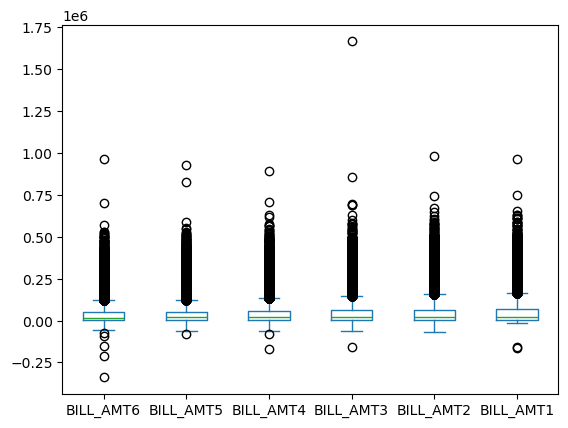

In [26]:
df.plot.box(column=['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2','BILL_AMT1'])

<Axes: >

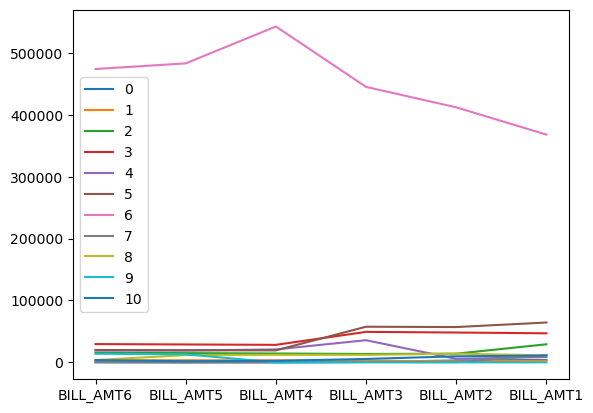

In [ ]:
df.loc[:10,['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2','BILL_AMT1']].T.plot()

#### Observations:
From this I can observe that since the bill amount can increase and decrease (this make sense as its a credit card), our model will predict if the next month will default

### Pay Amount Analysis

<Axes: >

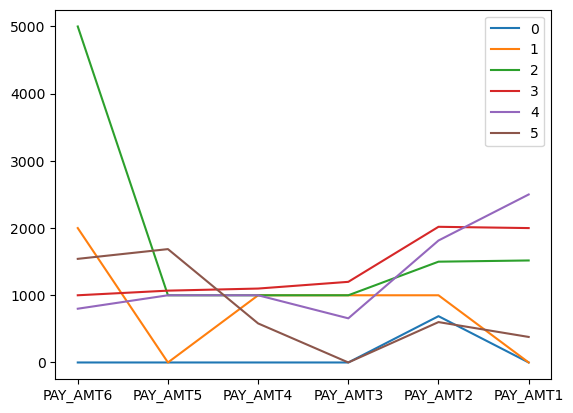

In [98]:
df.loc[:5,['PAY_AMT6','PAY_AMT5','PAY_AMT4','PAY_AMT3','PAY_AMT2','PAY_AMT1']].T.plot()

<Axes: >

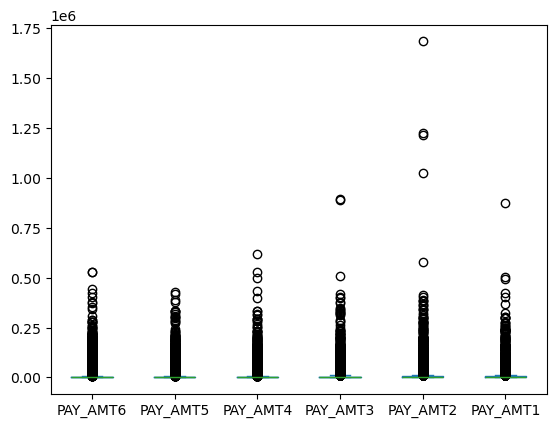

In [29]:
df.plot.box(column=['PAY_AMT6','PAY_AMT5','PAY_AMT4','PAY_AMT3','PAY_AMT2','PAY_AMT1'])

## Data Cleaning

### Auxiliary functions

In [ ]:
def remove_outliers(df, list_cols, threshold=2):
    for column in list_cols:
        # Calculate the absolute Z-scores for the column
        z_score_column_name=f'{column}_z_scores'
        df[z_score_column_name] = np.abs(stats.zscore(df[column]))

        # Filter the DataFrame to keep only non-outliers (Z-score within threshold)
        df=df[df[z_score_column_name] <= threshold]
        df.reset_index(drop=True, inplace=True)
    return df

In [ ]:
def normalize(df, list_cols,type='MinMax'):
    list_cols_norm=[x+'_norm' for x in list_cols]
    df.reset_index(drop=True,inplace=True)
    if type=='MinMax':
        min_max_scaler=MinMaxScaler()
        min_max_scaler.fit(df[list_cols])
        df=pd.concat([df, pd.DataFrame(min_max_scaler.transform(df[list_cols]),columns=list_cols_norm)],axis=1)
        return df, min_max_scaler
    elif type=='Standard':
        standard_scaler=StandardScaler()
        standard_scaler.fit(df[list_cols])
        df=pd.concat([df, pd.DataFrame(standard_scaler.transform(df[list_cols]), columns=list_cols_norm)], axis=1)
        return df, standard_scaler
    else:
        return Exception

In [31]:
# Remove outliers for LIMIT_BAL
df=remove_outliers(df, ['LIMIT_BAL'])

<Axes: >

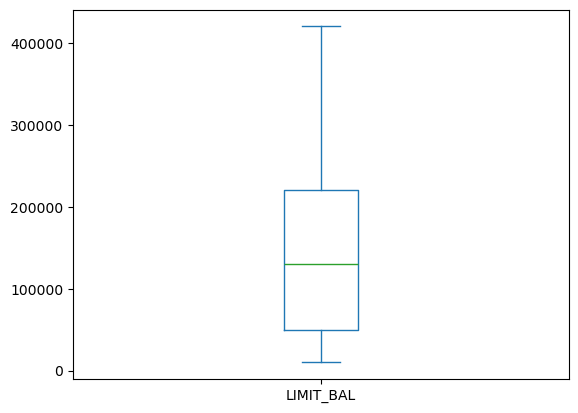

In [32]:
df.plot.box(column='LIMIT_BAL')

In [34]:
#Normalize LIMIT_BAL
df,min_max_scaler_limit_bal=normalize(df, ['LIMIT_BAL'],type='Standard')

In [35]:
df['SEX_male']=df['SEX'].apply(lambda x:x if x==1 else 0)

In [36]:
# One Hot encoding for EDUCATION
df['EDUCATION_graduate_school']=df['EDUCATION'].apply(lambda x:1 if x==1 else 0)
df['EDUCATION_university']=df['EDUCATION'].apply(lambda x:1 if x==2 else 0)
df['EDUCATION_high_school']=df['EDUCATION'].apply(lambda x:1 if x==3 else 0)

# Remove EDUCATION status 0, 4, 5, 6
df=df[df['EDUCATION']!=0]
df=df[df['EDUCATION']!=4]
df=df[df['EDUCATION']!=5]
df=df[df['EDUCATION']!=6]

In [37]:
#One hot encoding for MARRIAGE
df['MARRIAGE_married']=df['MARRIAGE'].apply(lambda x: 1 if x==1 else 0)
df['MARRIAGE_single']=df['MARRIAGE'].apply(lambda x: 1 if x==2 else 0)

# Remove MARRIAGE status 0, 3
df=df[df['MARRIAGE']!=0]
df=df[df['MARRIAGE']!=3]

In [38]:
# Remove outliers for AGE
df=remove_outliers(df, ['AGE'])

In [39]:
#Normalize AGE
df,min_max_scaler_age=normalize(df, ['AGE'])

In [40]:
# If the payment status is less than 1 overdue payments, then the status is 0 overdue payments
df['PAY_0']=df['PAY_0'].apply(lambda x: 0 if x<1 else x)
df['PAY_2']=df['PAY_2'].apply(lambda x: 0 if x<1 else x)
df['PAY_3']=df['PAY_3'].apply(lambda x: 0 if x<1 else x)
df['PAY_4']=df['PAY_4'].apply(lambda x: 0 if x<1 else x)
df['PAY_5']=df['PAY_5'].apply(lambda x: 0 if x<1 else x)
df['PAY_6']=df['PAY_6'].apply(lambda x: 0 if x<1 else x)

In [41]:
# Normalize PAY_0 to PAY_6
df,min_max_scaler_pay=normalize(df, ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],type='Standard')

In [42]:
# Remove outliers for ['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2','BILL_AMT1']
df=remove_outliers(df,['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2','BILL_AMT1'])

/var/folders/l4/7brfsvfj2h95x__h64jyk5n00000gr/T/ipykernel_92338/1894288798.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[z_score_column_name] = np.abs(stats.zscore(df[column]))


<Axes: >

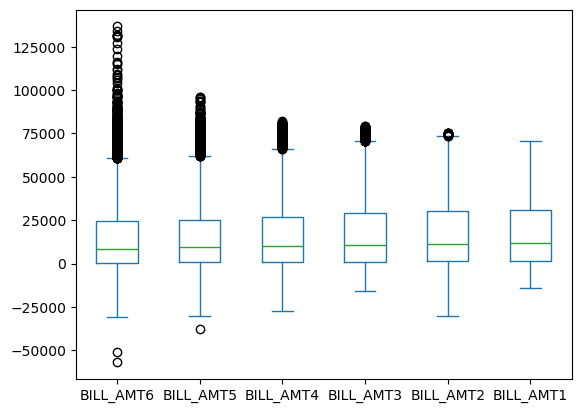

In [43]:
df.plot.box(column=['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2','BILL_AMT1'])

In [44]:
# Normalize ['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2','BILL_AMT1']
df,min_max_scaler_bill_amt=normalize(df, ['BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1'],type='Standard')

In [45]:
# Remove outliers for ['PAY_AMT6','PAY_AMT5','PAY_AMT4','PAY_AMT3','PAY_AMT2','PAY_AMT1']
df=remove_outliers(df,['PAY_AMT6','PAY_AMT5','PAY_AMT4','PAY_AMT3','PAY_AMT2','PAY_AMT1'])

/var/folders/l4/7brfsvfj2h95x__h64jyk5n00000gr/T/ipykernel_92338/1894288798.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[z_score_column_name] = np.abs(stats.zscore(df[column]))


<Axes: >

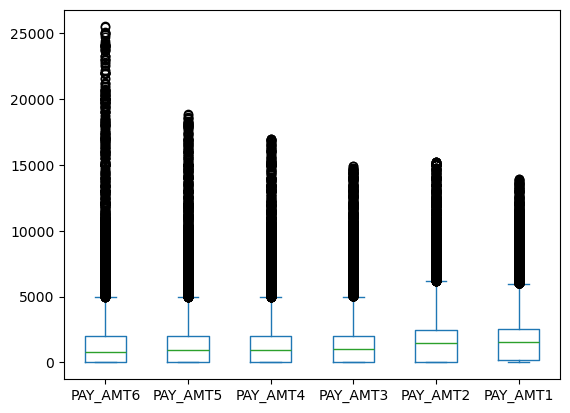

In [46]:
df.plot.box(column=['PAY_AMT6','PAY_AMT5','PAY_AMT4','PAY_AMT3','PAY_AMT2','PAY_AMT1'])

In [47]:
# Normalize ['PAY_AMT6','PAY_AMT5','PAY_AMT4','PAY_AMT3','PAY_AMT2','PAY_AMT1']
df,min_max_scaler_pay_amt=normalize(df, ['PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1'],type='Standard')

In [48]:
# Now we are going to select which columns to use:

df_filtered_out=df[['default.payment.next.month','LIMIT_BAL_norm','SEX_male','EDUCATION_graduate_school','EDUCATION_university','EDUCATION_high_school','MARRIAGE_married','MARRIAGE_single','AGE_norm','PAY_0_norm', 'PAY_2_norm', 'PAY_3_norm', 'PAY_4_norm', 'PAY_5_norm', 'PAY_6_norm','BILL_AMT6_norm','BILL_AMT5_norm','BILL_AMT4_norm','BILL_AMT3_norm','BILL_AMT2_norm','BILL_AMT1_norm','PAY_AMT6_norm','PAY_AMT5_norm','PAY_AMT4_norm','PAY_AMT3_norm','PAY_AMT2_norm','PAY_AMT1_norm']]
features=df[['LIMIT_BAL_norm','SEX_male','EDUCATION_graduate_school','EDUCATION_university','EDUCATION_high_school','MARRIAGE_married','MARRIAGE_single','AGE_norm','PAY_0_norm', 'PAY_2_norm', 'PAY_3_norm', 'PAY_4_norm', 'PAY_5_norm', 'PAY_6_norm','BILL_AMT6_norm','BILL_AMT5_norm','BILL_AMT4_norm','BILL_AMT3_norm','BILL_AMT2_norm','BILL_AMT1_norm','PAY_AMT6_norm','PAY_AMT5_norm','PAY_AMT4_norm','PAY_AMT3_norm','PAY_AMT2_norm','PAY_AMT1_norm']]

In [49]:
df_filtered_out

,default.payment.next.month,LIMIT_BAL_norm,SEX_male,EDUCATION_graduate_school,EDUCATION_university,EDUCATION_high_school,MARRIAGE_married,MARRIAGE_single,AGE_norm,PAY_0_norm,...,BILL_AMT4_norm,BILL_AMT3_norm,BILL_AMT2_norm,BILL_AMT1_norm,PAY_AMT6_norm,PAY_AMT5_norm,PAY_AMT4_norm,PAY_AMT3_norm,PAY_AMT2_norm,PAY_AMT1_norm
0,1,-1.214685,0,0,1,0,1,0,0.09375,2.127879,...,-0.906326,-0.890746,-0.781730,-0.757300,-0.580326,-0.652348,-0.672331,-0.753004,-0.537727,-0.900722
1,1,-0.276664,0,0,1,0,0,1,0.15625,-0.476632,...,-0.727575,-0.786360,-0.852104,-0.819505,0.110535,-0.652348,-0.241776,-0.306723,-0.404841,-0.900722
2,0,-0.558070,0,0,1,0,0,1,0.40625,-0.476632,...,-0.123416,-0.216662,-0.223385,0.522475,1.146826,-0.246818,-0.241776,-0.306723,-0.191199,-0.209237
3,0,-0.933278,0,0,1,0,1,0,0.50000,-0.476632,...,0.640483,1.654850,1.524782,1.419470,-0.234896,-0.218836,-0.198720,-0.217467,0.030562,0.010326
4,0,-0.933278,1,1,0,0,0,1,0.50000,-0.476632,...,0.153179,2.090465,1.976363,2.299234,-0.303982,-0.246818,-0.241776,-0.459798,-0.056604,0.238088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16786,0,0.004743,1,1,0,0,0,1,0.43750,-0.476632,...,-0.863715,-0.926991,-0.479841,-0.781960,-0.580326,-0.652348,-0.672331,-0.403566,-0.832126,3.223593
16787,1,0.567555,1,0,1,0,1,0,0.40625,3.430135,...,-0.769750,-0.795893,-0.812496,-0.828702,-0.580326,-0.652348,-0.672331,-0.753004,-0.832126,-0.900722
16788,0,-1.308487,1,0,0,1,1,0,0.68750,-0.476632,...,-0.906326,-0.926834,-0.408751,-0.510249,-0.580326,-0.652348,-0.672331,-0.753004,-0.832126,0.010326
16789,0,0.004743,1,0,0,1,0,1,0.68750,-0.476632,...,-0.415799,-0.743411,-0.846840,-0.869987,-0.580326,-0.652348,-0.616789,3.262625,0.674481,-0.063925


In [50]:
features.drop(['MARRIAGE_married','EDUCATION_graduate_school'], axis=1,inplace=True)
df_filtered_out.drop(['MARRIAGE_married','EDUCATION_graduate_school'], axis=1,inplace=True)

/var/folders/l4/7brfsvfj2h95x__h64jyk5n00000gr/T/ipykernel_92338/698108402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop(['MARRIAGE_married','EDUCATION_graduate_school'], axis=1,inplace=True)
/var/folders/l4/7brfsvfj2h95x__h64jyk5n00000gr/T/ipykernel_92338/698108402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_out.drop(['MARRIAGE_married','EDUCATION_graduate_school'], axis=1,inplace=True)


In [51]:
features.corr()

,LIMIT_BAL_norm,SEX_male,EDUCATION_university,EDUCATION_high_school,MARRIAGE_single,AGE_norm,PAY_0_norm,PAY_2_norm,PAY_3_norm,PAY_4_norm,...,BILL_AMT4_norm,BILL_AMT3_norm,BILL_AMT2_norm,BILL_AMT1_norm,PAY_AMT6_norm,PAY_AMT5_norm,PAY_AMT4_norm,PAY_AMT3_norm,PAY_AMT2_norm,PAY_AMT1_norm
LIMIT_BAL_norm,1.000000,-0.080899,-0.163147,-0.135966,-0.098833,0.152576,-0.173555,-0.219132,-0.206130,-0.195594,...,-0.244238,-0.265594,-0.271638,-0.251035,0.122559,0.122904,0.115926,0.108954,0.082807,0.070492
SEX_male,-0.080899,1.000000,-0.006236,0.019987,0.058683,0.068059,0.031176,0.045862,0.048151,0.047557,...,0.021730,0.031716,0.036789,0.035544,-0.037359,-0.025504,-0.015200,-0.035892,-0.019771,-0.004902
EDUCATION_university,-0.163147,-0.006236,1.000000,-0.440089,-0.077215,-0.048873,0.039310,0.062071,0.046682,0.045545,...,0.099601,0.107286,0.112501,0.110213,-0.027076,-0.026152,-0.016412,-0.017383,-0.014838,-0.018882
EDUCATION_high_school,-0.135966,0.019987,-0.440089,1.000000,-0.125973,0.211232,0.046114,0.047588,0.043475,0.036850,...,0.039291,0.047022,0.048057,0.047316,-0.022112,-0.023278,-0.023791,-0.019419,-0.024132,-0.015847
MARRIAGE_single,-0.098833,0.058683,-0.077215,-0.125973,1.000000,-0.490010,-0.012225,-0.006118,0.008876,-0.000459,...,0.020034,0.019119,0.022431,0.022070,0.012661,0.018451,0.011176,0.007753,0.003202,0.026665
AGE_norm,0.152576,0.068059,-0.048873,0.211232,-0.490010,1.000000,-0.009486,-0.015365,-0.018728,-0.013983,...,-0.053261,-0.049871,-0.050972,-0.050738,-0.001501,-0.005715,-0.004204,-0.003795,-0.006036,-0.026267
PAY_0_norm,-0.173555,0.031176,0.039310,0.046114,-0.012225,-0.009486,1.000000,0.665941,0.490149,0.449339,...,0.099283,0.079844,0.062657,0.034192,-0.098977,-0.090410,-0.100615,-0.115852,-0.137538,-0.186043
PAY_2_norm,-0.219132,0.045862,0.062071,0.047588,-0.006118,-0.015365,0.665941,1.000000,0.655663,0.495571,...,0.143684,0.123015,0.105870,0.088669,-0.066737,-0.058988,-0.068669,-0.073878,-0.103227,-0.213267
PAY_3_norm,-0.206130,0.048151,0.046682,0.043475,0.008876,-0.018728,0.490149,0.655663,1.000000,0.671031,...,0.132637,0.105566,0.095680,0.053081,-0.073251,-0.058443,-0.068187,-0.090383,-0.194117,0.005847
PAY_4_norm,-0.195594,0.047557,0.045545,0.036850,-0.000459,-0.013983,0.449339,0.495571,0.671031,1.000000,...,0.139261,0.117022,0.083238,0.052901,-0.065805,-0.055223,-0.076063,-0.149891,-0.006662,-0.051569


<Axes: >

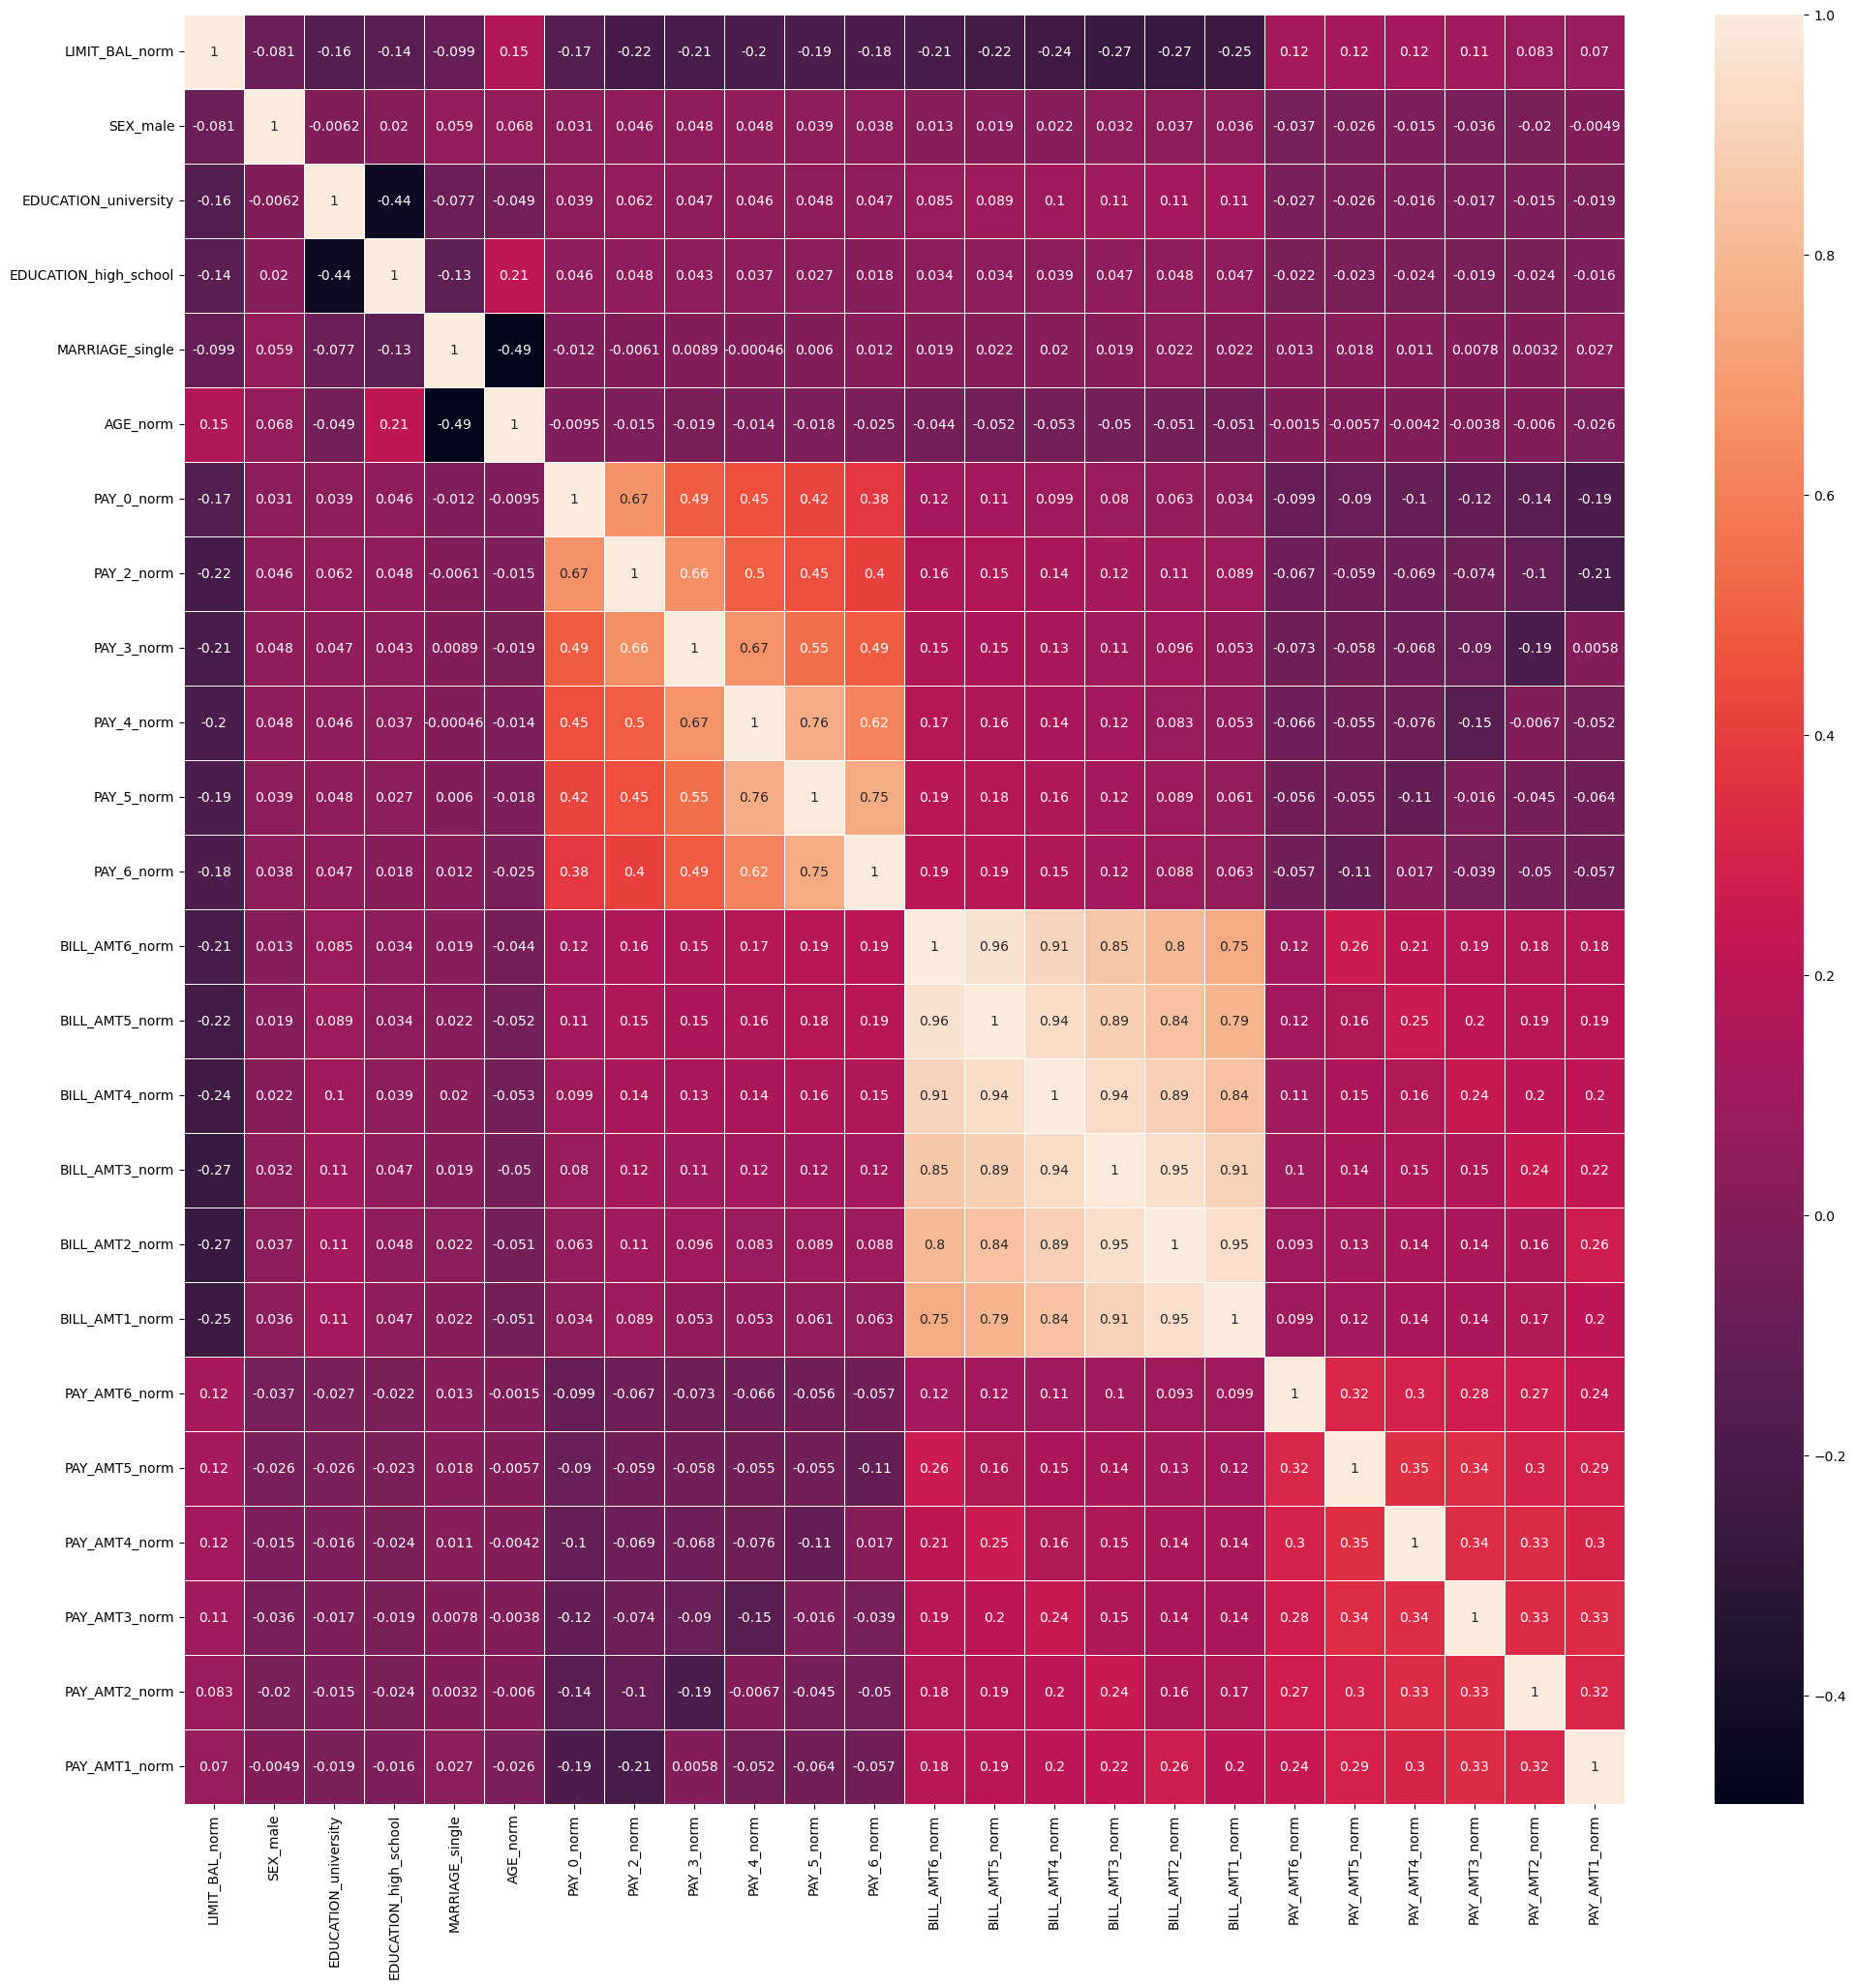

In [ ]:

plt.figure(figsize=(24, 24))
sns.heatmap(data=features.corr(),
            annot=True,
            linewidths=0.5)

In [53]:
df_filtered_out.drop("default.payment.next.month", axis=1).apply(lambda x: np.abs(x.corr(df_filtered_out['default.payment.next.month']))).sort_values(ascending=False)

PAY_0_norm               0.379842
PAY_2_norm               0.312858
PAY_3_norm               0.273857
PAY_4_norm               0.265833
PAY_5_norm               0.256003
PAY_6_norm               0.241306
LIMIT_BAL_norm           0.149069
PAY_AMT1_norm            0.119633
PAY_AMT2_norm            0.108031
PAY_AMT3_norm            0.100561
PAY_AMT4_norm            0.095792
PAY_AMT6_norm            0.083817
PAY_AMT5_norm            0.083547
BILL_AMT6_norm           0.053108
BILL_AMT5_norm           0.043644
SEX_male                 0.041435
BILL_AMT4_norm           0.039331
EDUCATION_high_school    0.033007
EDUCATION_university     0.030165
BILL_AMT3_norm           0.027965
MARRIAGE_single          0.027344
BILL_AMT2_norm           0.016091
AGE_norm                 0.010385
BILL_AMT1_norm           0.007397
dtype: float64

In [54]:
# I see that bill amount 1 to 6 are not a strong predictor and are high correlated, I will compute an average and trend and see if that new feature is better for the model

In [55]:
df['BILL_AMT_average']=df[['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2','BILL_AMT1']].mean(axis=1)

In [56]:
np.polyfit(x=range(6), y=[0,0,0,689,3102,3913], deg=1)[0]# polyfit will fit a polinomyal degree 1 to the 6 bill amounts, given x=[0:5]

844.5714285714286

In [57]:
df['BILL_AMT_trend']=df[['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2','BILL_AMT1']].apply(lambda x: np.polyfit(x=range(6), y=x, deg=1)[0], axis=1)

In [58]:
df[['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2','BILL_AMT1','BILL_AMT_average','BILL_AMT_trend']] # If we removed outliers for Bill Amounts... then the average and the trend should not have outliers, lets normalize

,BILL_AMT6,BILL_AMT5,BILL_AMT4,BILL_AMT3,BILL_AMT2,BILL_AMT1,BILL_AMT_average,BILL_AMT_trend
0,0.0,0.0,0.0,689.0,3102.0,3913.0,1284.000000,8.445714e+02
1,3261.0,3455.0,3272.0,2682.0,1725.0,2682.0,2846.166667,-2.478571e+02
2,15549.0,14948.0,14331.0,13559.0,14027.0,29239.0,16942.166667,1.854714e+03
3,29547.0,28959.0,28314.0,49291.0,48233.0,46990.0,38555.666667,4.743257e+03
4,20024.0,19619.0,19394.0,57608.0,57069.0,64400.0,39685.666667,1.064126e+04
...,...,...,...,...,...,...,...,...
16786,0.0,0.0,780.0,-3.0,9009.0,3425.0,2201.833333,1.239114e+03
16787,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.000000,-2.951253e-13
16788,0.0,0.0,0.0,0.0,10400.0,8802.0,3200.333333,2.148857e+03
16789,0.0,5190.0,8979.0,3502.0,1828.0,1683.0,3530.333333,-2.042286e+02


In [59]:
df_filtered_out=df[['default.payment.next.month','LIMIT_BAL_norm','SEX_male','EDUCATION_university','EDUCATION_high_school','MARRIAGE_single','AGE_norm','PAY_0_norm', 'PAY_2_norm', 'PAY_3_norm', 'PAY_4_norm', 'PAY_5_norm', 'PAY_6_norm','BILL_AMT_average','BILL_AMT_trend','PAY_AMT6_norm','PAY_AMT5_norm','PAY_AMT4_norm','PAY_AMT3_norm','PAY_AMT2_norm','PAY_AMT1_norm']]
features=df[['LIMIT_BAL_norm','SEX_male','EDUCATION_university','EDUCATION_high_school','MARRIAGE_single','AGE_norm','PAY_0_norm', 'PAY_2_norm', 'PAY_3_norm', 'PAY_4_norm', 'PAY_5_norm', 'PAY_6_norm','BILL_AMT_average','BILL_AMT_trend','PAY_AMT6_norm','PAY_AMT5_norm','PAY_AMT4_norm','PAY_AMT3_norm','PAY_AMT2_norm','PAY_AMT1_norm']]

In [60]:
features.corr()

,LIMIT_BAL_norm,SEX_male,EDUCATION_university,EDUCATION_high_school,MARRIAGE_single,AGE_norm,PAY_0_norm,PAY_2_norm,PAY_3_norm,PAY_4_norm,PAY_5_norm,PAY_6_norm,BILL_AMT_average,BILL_AMT_trend,PAY_AMT6_norm,PAY_AMT5_norm,PAY_AMT4_norm,PAY_AMT3_norm,PAY_AMT2_norm,PAY_AMT1_norm
LIMIT_BAL_norm,1.000000,-0.080899,-0.163147,-0.135966,-0.098833,0.152576,-0.173555,-0.219132,-0.206130,-0.195594,-0.188403,-0.182981,-0.258364,-0.117222,0.122559,0.122904,0.115926,0.108954,0.082807,0.070492
SEX_male,-0.080899,1.000000,-0.006236,0.019987,0.058683,0.068059,0.031176,0.045862,0.048151,0.047557,0.038882,0.038197,0.028241,0.038123,-0.037359,-0.025504,-0.015200,-0.035892,-0.019771,-0.004902
EDUCATION_university,-0.163147,-0.006236,1.000000,-0.440089,-0.077215,-0.048873,0.039310,0.062071,0.046682,0.045545,0.047581,0.046664,0.106601,0.057776,-0.027076,-0.026152,-0.016412,-0.017383,-0.014838,-0.018882
EDUCATION_high_school,-0.135966,0.019987,-0.440089,1.000000,-0.125973,0.211232,0.046114,0.047588,0.043475,0.036850,0.026967,0.018179,0.044125,0.030349,-0.022112,-0.023278,-0.023791,-0.019419,-0.024132,-0.015847
MARRIAGE_single,-0.098833,0.058683,-0.077215,-0.125973,1.000000,-0.490010,-0.012225,-0.006118,0.008876,-0.000459,0.006008,0.012350,0.021979,0.006830,0.012661,0.018451,0.011176,0.007753,0.003202,0.026665
AGE_norm,0.152576,0.068059,-0.048873,0.211232,-0.490010,1.000000,-0.009486,-0.015365,-0.018728,-0.013983,-0.018097,-0.025457,-0.052822,-0.015126,-0.001501,-0.005715,-0.004204,-0.003795,-0.006036,-0.026267
PAY_0_norm,-0.173555,0.031176,0.039310,0.046114,-0.012225,-0.009486,1.000000,0.665941,0.490149,0.449339,0.419193,0.379691,0.086779,-0.093389,-0.098977,-0.090410,-0.100615,-0.115852,-0.137538,-0.186043
PAY_2_norm,-0.219132,0.045862,0.062071,0.047588,-0.006118,-0.015365,0.665941,1.000000,0.655663,0.495571,0.447363,0.404218,0.134780,-0.074012,-0.066737,-0.058988,-0.068669,-0.073878,-0.103227,-0.213267
PAY_3_norm,-0.206130,0.048151,0.046682,0.043475,0.008876,-0.018728,0.490149,0.655663,1.000000,0.671031,0.547154,0.489683,0.118858,-0.107421,-0.073251,-0.058443,-0.068187,-0.090383,-0.194117,0.005847
PAY_4_norm,-0.195594,0.047557,0.045545,0.036850,-0.000459,-0.013983,0.449339,0.495571,0.671031,1.000000,0.758960,0.619217,0.124577,-0.135652,-0.065805,-0.055223,-0.076063,-0.149891,-0.006662,-0.051569


<Axes: >

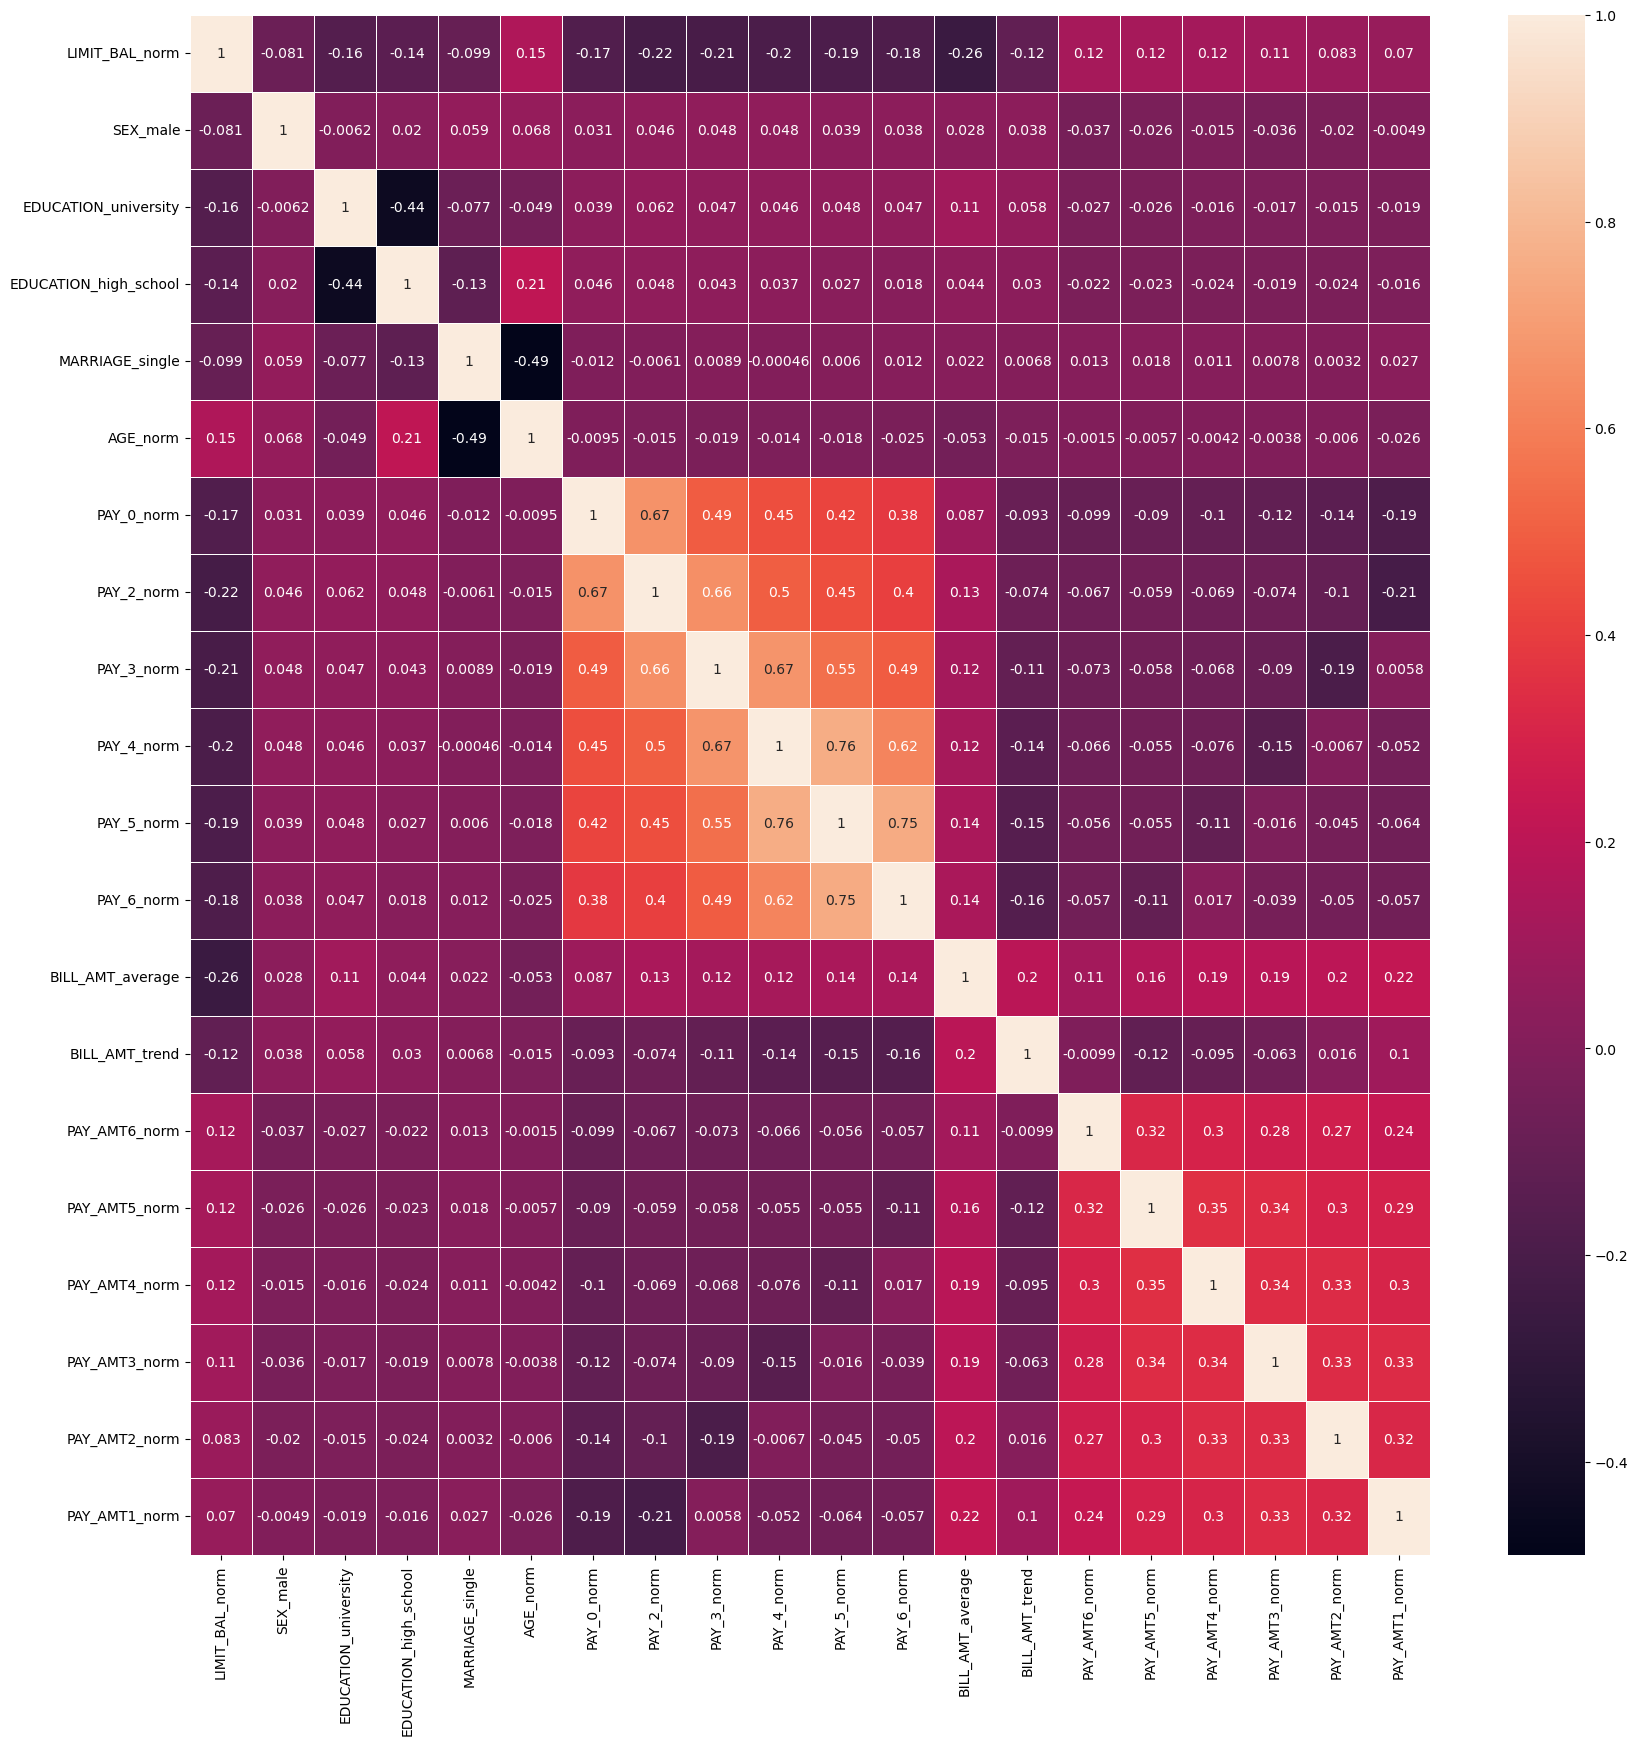

In [ ]:

plt.figure(figsize=(20, 20))
sns.heatmap(data=features.corr(),
            annot=True,
            linewidths=0.5)

In [62]:
df_filtered_out.drop("default.payment.next.month", axis=1).apply(lambda x: np.abs(x.corr(df_filtered_out['default.payment.next.month']))).sort_values(ascending=False)

PAY_0_norm               0.379842
PAY_2_norm               0.312858
PAY_3_norm               0.273857
PAY_4_norm               0.265833
PAY_5_norm               0.256003
PAY_6_norm               0.241306
LIMIT_BAL_norm           0.149069
PAY_AMT1_norm            0.119633
PAY_AMT2_norm            0.108031
PAY_AMT3_norm            0.100561
PAY_AMT4_norm            0.095792
PAY_AMT6_norm            0.083817
PAY_AMT5_norm            0.083547
BILL_AMT_trend           0.070061
SEX_male                 0.041435
EDUCATION_high_school    0.033007
EDUCATION_university     0.030165
BILL_AMT_average         0.029283
MARRIAGE_single          0.027344
AGE_norm                 0.010385
dtype: float64

## Model building

In [63]:
X=features
y=df_filtered_out['default.payment.next.month']

### Data splitting

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [65]:
y_test

2360     0
9249     1
2616     0
3995     0
13193    0
        ..
1971     1
7862     0
3798     0
4863     0
13247    1
Name: default.payment.next.month, Length: 5542, dtype: int64

In [66]:
results={}

### Logistic Regression Model

0.7818477084085168
[[3875  248]
 [ 961  458]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.87      4123
           1       0.65      0.32      0.43      1419

    accuracy                           0.78      5542
   macro avg       0.73      0.63      0.65      5542
weighted avg       0.76      0.78      0.75      5542

ROC-AUC: 0.6313060664345854


/Users/actlyong/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


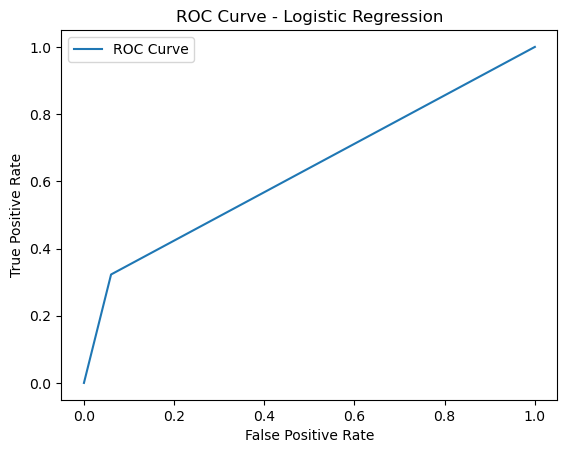

In [ ]:
lr = LogisticRegression(max_iter=1000)

lr.fit(X_train, y_train)

# Now lets evaluate predictions
lr_preds = lr.predict(X_test)
lr_acc = lr.score(X_test, y_test) #Return the mean accuracy on the given test data and labels.
print(lr_acc)

results['LogisticRegression']={'accuracy':lr_acc}

# We can also evaluate the model using a confusion matrix

lr_cm=confusion_matrix(y_true=y_test,y_pred=lr_preds)
tn, fp, fn, tp = lr_cm.ravel().tolist()

print(lr_cm)

lr_recall=tp/(tp+fn) # recall
lr_precision=tp/(tp+fp) # precision

results['LogisticRegression']['Recall']=lr_recall
results['LogisticRegression']['Precision']=lr_precision

# Lets compute accuracy, precision, recall and f1 score

print(classification_report(y_test, lr_preds))

# Now let's compute a ROC-AUC

lr_ROC_AUC_score=roc_auc_score(y_test, lr_preds)

print(f'ROC-AUC: {lr_ROC_AUC_score}')

results['LogisticRegression']['ROC-AUC']=lr_ROC_AUC_score

#Lets graph a ROC curve with different threshold values

fpr, tpr, thresholds = roc_curve(y_test, lr_preds)

plt.plot(fpr, tpr, label='ROC Curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC Curve - Logistic Regression')

plt.legend()


### Random Forest Model

Accuracy Score: 0.7775171418260556 


 Confussion Matrix: 

[[3796  327]
 [ 906  513]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      4123
           1       0.61      0.36      0.45      1419

    accuracy                           0.78      5542
   macro avg       0.71      0.64      0.66      5542
weighted avg       0.76      0.78      0.76      5542


 ROC AUC score: 

0.6411055087763738


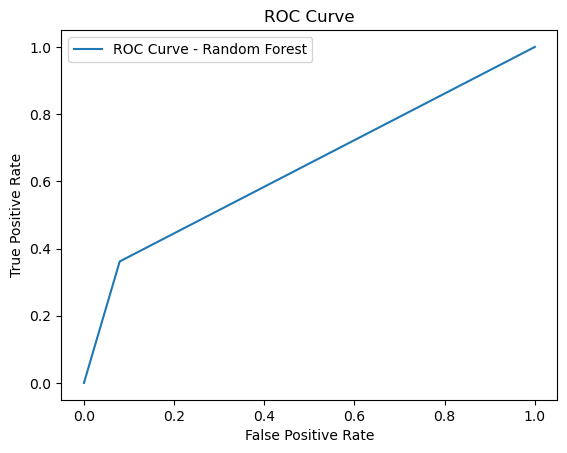

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

rf_acc = rf.score(X_test, y_test)
results['RandomForest']={'accuracy':rf_acc}

print(f'Accuracy Score: {rf_acc} \n')

print('\n Confussion Matrix: \n')

rf_cm=confusion_matrix(y_true=y_test, y_pred=rf_preds)

print(rf_cm)

tn, fp, fn, tp = rf_cm.ravel().tolist()

rf_recall=tp/(tp+fn) # recall
rf_precision=tp/(tp+fp) # precision

results['RandomForest']['Recall']=rf_recall
results['RandomForest']['Precision']=rf_precision

print('\n Classification Report: \n')

print(classification_report(y_test, rf_preds))

print('\n ROC AUC score: \n')

rf_roc_auc_score=roc_auc_score(y_test, rf_preds)
results['RandomForest']['ROC-AUC']=rf_roc_auc_score

print(rf_roc_auc_score)

fpr, tpr, thresholds = roc_curve(y_test, rf_preds)

plt.plot(fpr, tpr, label='ROC Curve - Random Forest')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.legend()


Now we are going to train the models using SMOTE (Synthetic Minority Over-sampling Technique) technique, which will help us to balance the target variable  

In [ ]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

### Logistic Regression with SMOTE

0.734572356549982
[[3294  829]
 [ 642  777]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      4123
           1       0.48      0.55      0.51      1419

    accuracy                           0.73      5542
   macro avg       0.66      0.67      0.67      5542
weighted avg       0.75      0.73      0.74      5542

ROC-AUC: 0.6732507631350763


/Users/actlyong/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


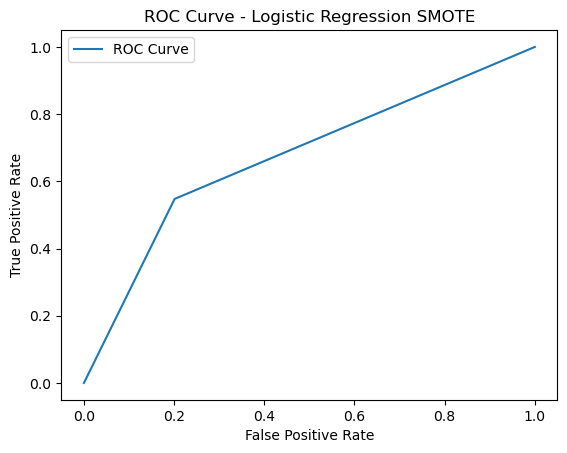

In [ ]:
lr_smote = LogisticRegression(max_iter=1000)

lr_smote.fit(X_train_balanced, y_train_balanced)

# Now lets evaluate predictions
lr_smote_preds = lr_smote.predict(X_test)
lr_smote_acc = lr_smote.score(X_test, y_test) #Return the mean accuracy on the given test data and labels.
print(lr_smote_acc)

results['LogisticRegression_SMOTE']={'accuracy':lr_smote_acc}

# confusion matrix

lr_smote_cm=confusion_matrix(y_true=y_test,y_pred=lr_smote_preds)
tn, fp, fn, tp = lr_smote_cm.ravel().tolist()

print(lr_smote_cm)

lr_smote_recall=tp/(tp+fn) # recall
lr_smote_precision=tp/(tp+fp) # precision

results['LogisticRegression_SMOTE']['Recall']=lr_smote_recall
results['LogisticRegression_SMOTE']['Precision']=lr_smote_precision

# Lets compute accuracy, precision, recall and f1 score

print(classification_report(y_test, lr_smote_preds))

# Now let's compute a ROC-AUC

lr_smote_ROC_AUC_score=roc_auc_score(y_test, lr_smote_preds)

print(f'ROC-AUC: {lr_smote_ROC_AUC_score}')

results['LogisticRegression_SMOTE']['ROC-AUC']=lr_smote_ROC_AUC_score

#Lets graph a ROC curve with different threshold values

fpr, tpr, thresholds = roc_curve(y_test, lr_smote_preds)

plt.plot(fpr, tpr, label='ROC Curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC Curve - Logistic Regression SMOTE')

plt.legend()


### Random Forest with SMOTE

Accuracy Score: 0.7647058823529411 


 Confussion Matrix: 

[[3658  465]
 [ 839  580]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      4123
           1       0.56      0.41      0.47      1419

    accuracy                           0.76      5542
   macro avg       0.68      0.65      0.66      5542
weighted avg       0.75      0.76      0.75      5542


 ROC AUC score: 

0.647978296693107


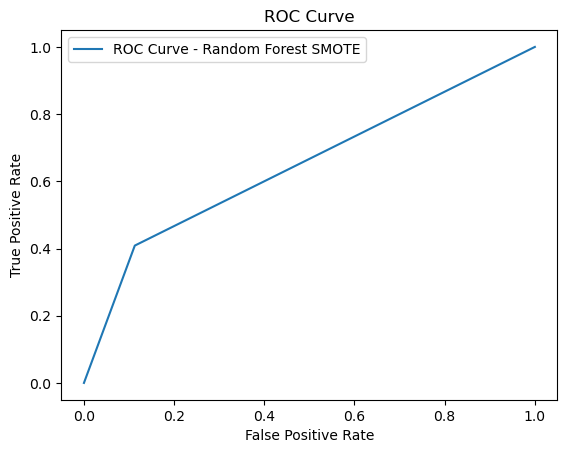

In [ ]:
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)

rf_smote.fit(X_train_balanced, y_train_balanced)
rf_smote_preds = rf_smote.predict(X_test)

rf_smote_acc = rf_smote.score(X_test, y_test)
results['RandomForest_SMOTE']={'accuracy':rf_smote_acc}

print(f'Accuracy Score: {rf_smote_acc} \n')

print('\n Confussion Matrix: \n')

rf_smote_cm=confusion_matrix(y_true=y_test, y_pred=rf_smote_preds)

print(rf_smote_cm)

tn, fp, fn, tp = rf_smote_cm.ravel().tolist()

rf_smote_recall=tp/(tp+fn) # recall
rf_smote_precision=tp/(tp+fp) # precision

results['RandomForest_SMOTE']['Recall']=rf_smote_recall
results['RandomForest_SMOTE']['Precision']=rf_smote_precision

print('\n Classification Report: \n')

print(classification_report(y_test, rf_smote_preds))

print('\n ROC AUC score: \n')

rf_smote_roc_auc_score=roc_auc_score(y_test, rf_smote_preds)
results['RandomForest_SMOTE']['ROC-AUC']=rf_smote_roc_auc_score

print(rf_smote_roc_auc_score)

fpr, tpr, thresholds = roc_curve(y_test, rf_smote_preds)

plt.plot(fpr, tpr, label='ROC Curve - Random Forest SMOTE')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.legend()



## Results

In [74]:
pd.DataFrame(results)

,LogisticRegression,RandomForest,LogisticRegression_SMOTE,RandomForest_SMOTE
accuracy,0.781848,0.777517,0.734572,0.764706
Recall,0.322763,0.361522,0.547569,0.408739
Precision,0.648725,0.610714,0.483811,0.555024
ROC-AUC,0.631306,0.641106,0.673251,0.647978


## Conclusions
   
**Best Model:** Logistic Regression with SMOTE
- Highest ROC-AUC: 0.673
- Best recall: 54.8% (catches more defaults)
- Saves 38.8M NT dollars annually vs baseline

**Limitations:**
- Data from 2005 (may not reflect current credit behavior)
- Taiwan-specific (not generalizable to other markets)
- Limited features (no income, employment data)

**Deployment Recommendations:**
- Batch scoring for monthly credit reviews
- Real-time API for new credit applications
- Set threshold based on risk tolerance

**Future Improvements:**
- Hyperparameter tuning (GridSearchCV)
- Try XGBoost/LightGBM
- Add more features (payment velocity, utilization rate)
- Implement model monitoring for drift

In [116]:
display(Markdown(f"""
Looking at the metrics for each model, and since for our problem a false negative is the worst case (From all the credits that will default our model predicts only few), we need to focus on recall instead of precision.

On average for each credit the financial institution borrows: ${limit_bal_mean/1000:,.0f}K NT dollars

The annual interest rate for the credit cards in taiwan is between 5.88% - 15% [1]

Lets assume the interest rate is 15%"""))

interest_rate=0.15
potential_interest_income=limit_bal_mean*interest_rate

display(Markdown(f"""
For each credit that the financial instituion borrows, they potentially can earn: ${potential_interest_income/1000:,.0f}K NT dollars, considering only the first year

{'-'*100}

Choosing the **Logistic Regression model before SMOTE**, in which

3875 True negatives, 248 false positives, 961 false negatives and 458 true positives
"""))

lr_fn_loss=limit_bal_mean*961
lr_fp_loss=limit_bal_mean*.15*248
lr_total_loss=lr_fn_loss+lr_fp_loss
display(Markdown(f"""

Loss due to false negatives is: ${lr_fn_loss/1000000:,.1f}M NT dollars

\\+

Loss due to false positive is: ${lr_fp_loss/1000000:,.1f}M NT dollars

Total loss is: ${lr_total_loss/1000000:,.1f}M

{'-'*100}

Choosing the **Logistic Regression model after SMOTE**, in which

3294 True negatives, 829 false positives, 642 false negatives and 777 true positives
"""))

lr_smote_fn_loss=limit_bal_mean*642
lr_smote_fp_loss=limit_bal_mean*.15*829
lr_smote_total_loss=lr_smote_fn_loss+lr_smote_fp_loss
display(Markdown(f"""

Loss due to false negatives is: ${lr_smote_fn_loss/1000000:,.1f}M NT dollars

\\+

Loss due to false positive is: ${lr_smote_fp_loss/1000000:,.1f}M NT dollars

Total loss: ${lr_smote_total_loss/1000000:,.1f}M NT dollars

{'-'*100}

By choosing the Logistic Regression model after SMOTE, we will make the company save:

**${(lr_total_loss-lr_smote_total_loss)/1000000:,.1f}M NT dollars**

{'-'*100}
## References:

[1] https://www.esunbank.com/en/personal/credit-card/payinfo#:~:text=The%20Bank's%20credit%20card%20interest,Revolving%20interest%20calculation%20method
"""))


Looking at the metrics for each model, and since for our problem a false negative is the worst case (From all the credits that will default our model predicts only few), we need to focus on recall instead of precision.

On average for each credit the financial institution borrows: $167K NT dollars

The annual interest rate for the credit cards in taiwan is between 5.88% - 15% [1]

Lets assume the interest rate is 15%


For each credit that the financial instituion borrows, they potentially can earn: $25K NT dollars, considering only the first year

----------------------------------------------------------------------------------------------------

Choosing the **Logistic Regression model before SMOTE**, in which

3875 True negatives, 248 false positives, 961 false negatives and 458 true positives




Loss due to false negatives is: $161.0M NT dollars

\+

Loss due to false positive is: $6.2M NT dollars

Total loss is: $167.2M

----------------------------------------------------------------------------------------------------

Choosing the **Logistic Regression model after SMOTE**, in which

3294 True negatives, 829 false positives, 642 false negatives and 777 true positives




Loss due to false negatives is: $107.5M NT dollars

\+

Loss due to false positive is: $20.8M NT dollars

Total loss: $128.4M NT dollars

----------------------------------------------------------------------------------------------------

By choosing the Logistic Regression model after SMOTE, we will make the company save:

**$38.8M NT dollars**

----------------------------------------------------------------------------------------------------
## References:

[1] https://www.esunbank.com/en/personal/credit-card/payinfo#:~:text=The%20Bank's%20credit%20card%20interest,Revolving%20interest%20calculation%20method
